## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle on Top Spotify Songs. No need to dowload it, it is already in the `exercises` directory.

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

In [6]:
# import all librarys and modules needed
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# import and clean data
spotyify_songs=pd.read_csv(r'C:\Users\ganes\Desktop\LaunchCode\data-analysis-projects\data-viz-with-py\exercises\Popular_Spotify_Songs.csv', encoding='latin1')
spotyify_songs.head()
#spotyify_songs.info()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Creating Visualizations

Now that the data is ready, you can use the dataset to create a number of different visualizations. You do not need to make the visualizations perfect; this is just for practice.

#### Line Chart

<Axes: xlabel='released_year', ylabel='in_spotify_playlists'>

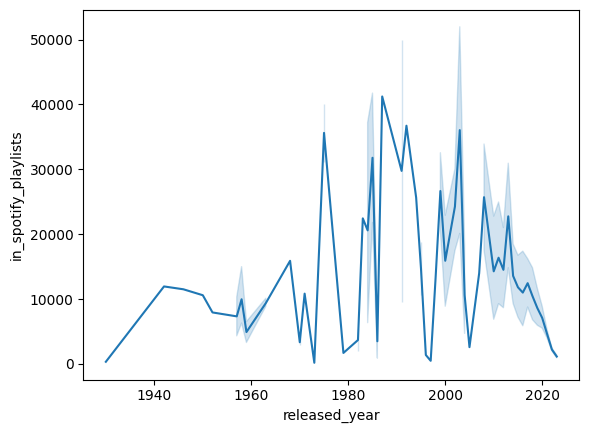

In [15]:
# Single line chart
import seaborn as sns


sns.lineplot(x='released_year', y='in_spotify_playlists', data=spotyify_songs)


In [25]:
# Multiple Line chart 
group=('danceability_%'),('valence_%'),('energy_%')

sns.lineplot(x='released_year', y='in_spotify_playlists', hue='group', data=spotyify_songs)

ValueError: Could not interpret value `group` for `hue`. An entry with this name does not appear in `data`.

#### Bar Chart

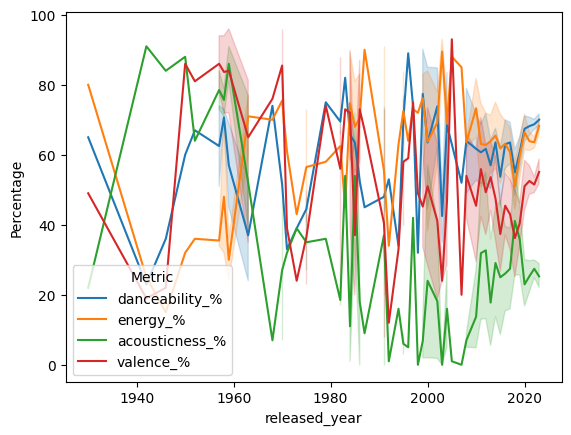

In [40]:
# Vertical bar chart
melted_df = pd.melt(spotyify_songs, 
                    id_vars='released_year', 
                    value_vars=['danceability_%', 'energy_%', 'acousticness_%', 'valence_%'],
                    var_name='Metric', 
                    value_name='Percentage')
sns.lineplot(x='released_year', y='Percentage', hue='Metric', data=melted_df)
plt.show()

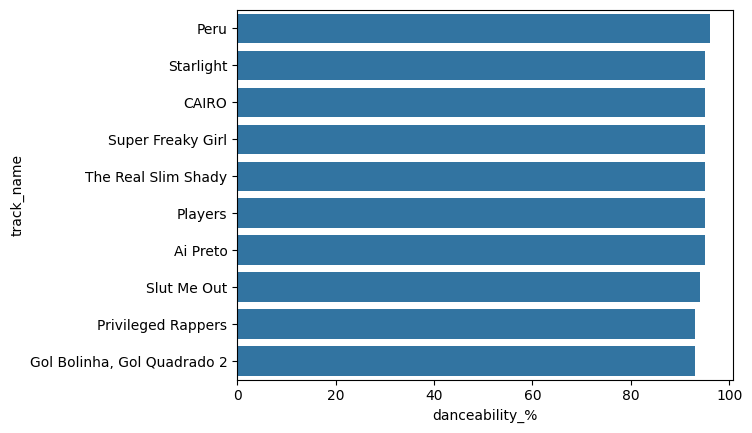

In [42]:
# Horizontal bar chart
spotyify_songs_sorted = spotyify_songs.sort_values(by='danceability_%', ascending=False).head(10)
sns.barplot(x='danceability_%', y='track_name', data=spotyify_songs_sorted)
plt.show()

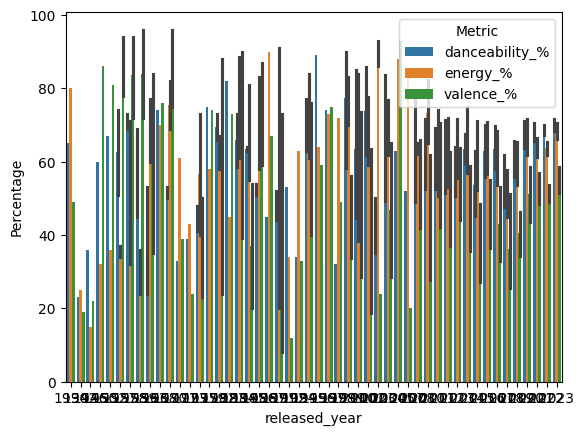

In [43]:
# Grouped bar chart
melted_spotyify_songs = pd.melt(spotyify_songs, 
                    id_vars='released_year', 
                    value_vars=['danceability_%', 'energy_%', 'valence_%'], 
                    var_name='Metric', 
                    value_name='Percentage')
sns.barplot(x='released_year', y='Percentage', hue='Metric', data=melted_spotyify_songs)
plt.show()

#### Scatter Plot

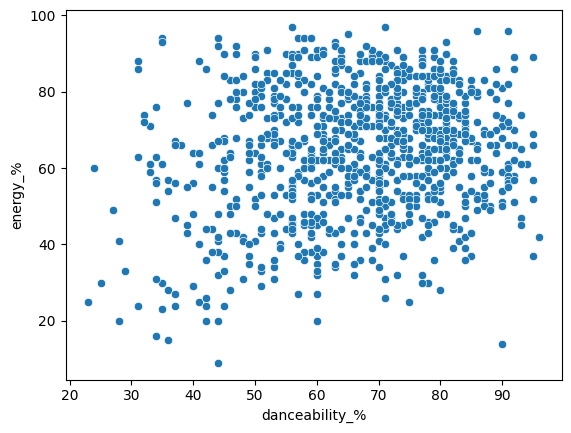

In [44]:
# scatter plot
sns.scatterplot(x='danceability_%', y='energy_%', data=spotyify_songs)
plt.show()

#### Histogram

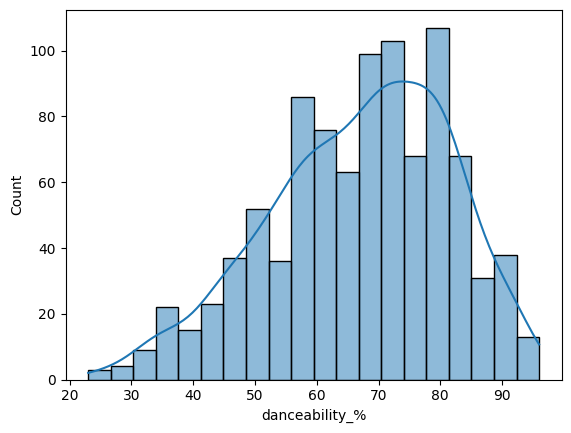

In [45]:
# histogram
sns.histplot(spotyify_songs['danceability_%'], bins=20, kde=True)
plt.show()

#### Pie Chart

([<matplotlib.patches.Wedge at 0x24628e183b0>,
 [Text(-1.0678689115348392, -0.26392420839589087, 'Major'),
  Text(1.0678688884618472, 0.2639243017519588, 'Minor')],
 [Text(-0.5824739517462759, -0.14395865912503136, '57.7%'),
  Text(0.5824739391610075, 0.14395871004652297, '42.3%')])

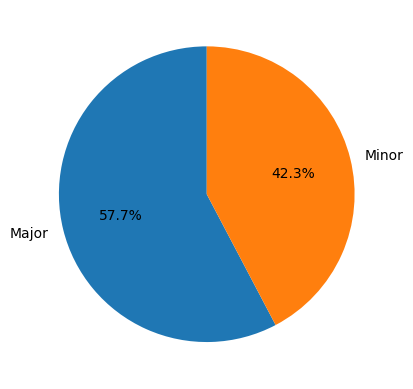

In [46]:
# pie chart
mode_counts = spotyify_songs['mode'].value_counts()
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90)